In [160]:
###################################################################################
# Purpose: Sentiment Analysis                                                     #
# input:   tweets taken from twitter account of POTUS                             #
# output:  Polarity and subjectivity by each tweet                                #
# Author:  Bhat Dittakavi of Variance.AI (a downloaded code that I have modified) #
###################################################################################

# Dependencies
import tweepy                                # twitter api
import pandas as pd                          # data analysis (dataframes, read file)
import numpy as np                           # arrays and linear algebra
from IPython.display import display          # print output in tabular format
import matplotlib.pyplot as plt              # for 2D plotting
from bokeh.plotting import figure            # library to create a new figure for plotting
from bokeh.io import show, output_notebook   # Configure the output state to output in notebook cells
#%matplotlib inline                          # for plotting inline (next to the code)


In [124]:
## Twitter Credentials

# 1) Go to apps.twitter.com
# 2) Create a twitter app
# 3) Get the following 4 credentials from the app

consumerkey       = '7Tqn943TW2Cikh5aB2lwxsvSl'  #You have to get your own keys.
consumersecret    = 'I8ztguBy5QqwwnrZakOnvWp0LawCi9OJNvhyxAsRuQBSFd6rd6'
accesstoken       ='126280810-W4Z7lhvN5kf0GB8FxpsJSumut8cKtAGHeRa8CYqS'
accesstokensecret = 'rRL0IDlp1lkYk3ZY3WmIGTlaHLZfUFIFcmgOLH6BtuyAF'

In [161]:
## Function to establish connection with twitter

def info_extraction(): 
    oauth = tweepy.OAuthHandler(consumerkey, consumersecret)  # passing consumerkey and consumersecret as paramaters to OAuthHandler attribute
    oauth.set_access_token(accesstoken, accesstokensecret)    # passing accesstoken and accesstokensecret as parameters to set_access_token
    connection = tweepy.API(oauth)                            # establishing connection using all the credentials
    return connection                                         # returning the connection back to the function



In [162]:
## Retrieving Tweets

# Tweets can be retrieved by passing required parameters


connection = info_extraction()                                                 # Calling the funtion from where we have got the connection

tweets = connection.search("Demonetization",lang="en")
#dir(tweets[1])   #Lists attributes of the first tweet object   

print("Number of tweets that are extracted: {}\n".format(len(tweets))) 
print("10 recent tweets:\n")
for x in tweets[:10]:
    print(x.text)                                                              # .text is for getting plain text 

Number of tweets that are extracted: 15

10 recent tweets:

RT @DaharwalK: @SushmaSwaraj Mdm in last one week we got to know how AmitShah has worked tirelessly to make BJP richest party of Country by…
RT @circuit_hai_kya: "Demonetization was a real Emergency on account of every poor Indian proclaimed by Chowkidar in which all 125 cr India…
RT @circuit_hai_kya: "Demonetization was a real Emergency on account of every poor Indian proclaimed by Chowkidar in which all 125 cr India…
RT @TanvirSalim1: Talking to people at ground zero, I notice people's disappointment with PM Modi. The Mantra of 'achche din' is taking its…
Talking to people at ground zero, I notice people's disappointment with PM Modi. The Mantra of 'achche din' is taki… https://t.co/MPdduZVwAa
RT @avinashpandeinc: Probably the reason why Demonetization is considered a success and its anniversary is celebrated by the BJP while for…
RT @Dipankar_cpiml: Is #TreeCutting the latest fad of the Modi government? Felling thousands of

# Twitter Data on demonetisation in the last week from code execution.

In [163]:
## Creating DateFrame for Tweets

data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets']) 
print(data.head(10))


                                              Tweets
0  RT @DaharwalK: @SushmaSwaraj Mdm in last one w...
1  RT @circuit_hai_kya: "Demonetization was a rea...
2  RT @circuit_hai_kya: "Demonetization was a rea...
3  RT @TanvirSalim1: Talking to people at ground ...
4  Talking to people at ground zero, I notice peo...
5  RT @avinashpandeinc: Probably the reason why D...
6  RT @Dipankar_cpiml: Is #TreeCutting the latest...
7  RT @circuit_hai_kya: "Demonetization was a rea...
8  RT @dhruv_rathee: India's Biggest Scam - Demon...
9  RT @dhruv_rathee: During Demonetization, the m...


In [164]:
## Adding Columns to DataFrame

data['len']  = np.array([len(tweet.text) for tweet in tweets])      
data['Date'] = np.array([tweet.created_at for tweet in tweets])     
data['Likes']= np.array([tweet.favorite_count for tweet in tweets])
data['RTs']= np.array([tweet.retweet_count for tweet in tweets])
data['User']=np.array([tweet.user for tweet in tweets])
data['Id']=np.array([tweet.id for tweet in tweets])



In [165]:
## Display DataFrame

display(data[1:5]) 

,Tweets,len,Date,Likes,RTs,User,Id
1,"RT @circuit_hai_kya: ""Demonetization was a rea...",140,2018-06-24 14:36:51,0,14,User(_api=<tweepy.api.API object at 0x119d8f9b...,1010894528939679744
2,"RT @circuit_hai_kya: ""Demonetization was a rea...",140,2018-06-24 14:36:39,0,14,User(_api=<tweepy.api.API object at 0x119d8f9b...,1010894475684728832
3,RT @TanvirSalim1: Talking to people at ground ...,140,2018-06-24 14:35:34,0,1,User(_api=<tweepy.api.API object at 0x119d8f9b...,1010894203856084992
4,"Talking to people at ground zero, I notice peo...",140,2018-06-24 14:35:16,1,1,User(_api=<tweepy.api.API object at 0x119d8f9b...,1010894130845704192


In [166]:
## Clean and Sentiment Analysis the Tweet

from textblob import TextBlob                    # library for processing textual data          
import re

def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
    #We're returning the tweet which is cleaned(after replacin' the above pattern to null which means deleting)


def get_polarity(tweet):                         # here we're getting the polarity of each tweet after analysing it
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:          #polarity tells whether the tweet is postive or negative or neutral
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [167]:
## Adding Sentiment Column

data['Sentiment'] = np.array([ get_polarity(tweet) for tweet in data['Tweets'] ])

In [168]:
## Print top 10 tweets and notice Sentiment field added at the end of each record
print(data.head(10))

                                              Tweets  len                Date  \
0  RT @DaharwalK: @SushmaSwaraj Mdm in last one w...  140 2018-06-24 14:37:03   
1  RT @circuit_hai_kya: "Demonetization was a rea...  140 2018-06-24 14:36:51   
2  RT @circuit_hai_kya: "Demonetization was a rea...  140 2018-06-24 14:36:39   
3  RT @TanvirSalim1: Talking to people at ground ...  140 2018-06-24 14:35:34   
4  Talking to people at ground zero, I notice peo...  140 2018-06-24 14:35:16   
5  RT @avinashpandeinc: Probably the reason why D...  139 2018-06-24 14:33:45   
6  RT @Dipankar_cpiml: Is #TreeCutting the latest...  139 2018-06-24 14:33:28   
7  RT @circuit_hai_kya: "Demonetization was a rea...  140 2018-06-24 14:33:00   
8  RT @dhruv_rathee: India's Biggest Scam - Demon...  140 2018-06-24 14:32:51   
9  RT @dhruv_rathee: During Demonetization, the m...  140 2018-06-24 14:32:49   

   Likes   RTs                                               User  \
0      0     1  User(_api=<tweepy.api.A

In [169]:
## Classifying the tweets

positive_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['Sentiment'][index] > 0]
neutral_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['Sentiment'][index] == 0]
negative_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['Sentiment'][index] < 0]      

positive_data = pd.DataFrame (data = [ tweet for index, tweet in enumerate(data['Tweets']) if data['Sentiment'][index] > 0])
neutral_data = [ tweet for index, tweet in enumerate(data['Tweets']) if data['Sentiment'][index] == 0]
negative_data = [ tweet for index, tweet in enumerate(data['Tweets']) if data['Sentiment'][index] < 0]      

In [170]:
positive_data

,0
0,RT @avinashpandeinc: Probably the reason why D...
1,RT @Dipankar_cpiml: Is #TreeCutting the latest...


In [171]:
## Print the negative tweets

print(negative_tweets[:10])

['RT @circuit_hai_kya: "Demonetization was a real Emergency on account of every poor Indian proclaimed by Chowkidar in which all 125 cr India…', 'RT @circuit_hai_kya: "Demonetization was a real Emergency on account of every poor Indian proclaimed by Chowkidar in which all 125 cr India…', "RT @TanvirSalim1: Talking to people at ground zero, I notice people's disappointment with PM Modi. The Mantra of 'achche din' is taking its…", "Talking to people at ground zero, I notice people's disappointment with PM Modi. The Mantra of 'achche din' is taki… https://t.co/MPdduZVwAa", 'RT @circuit_hai_kya: "Demonetization was a real Emergency on account of every poor Indian proclaimed by Chowkidar in which all 125 cr India…', 'During demonetization there was the chance for the bjp leaders and capitalists to convert their black money to whit… https://t.co/OykTy8cNPi', 'RT @circuit_hai_kya: "Demonetization was a real Emergency on account of every poor Indian proclaimed by Chowkidar in which all 125 cr 

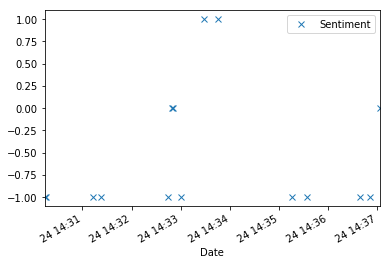

In [172]:
## Plotting sentiment points 

data.plot(x='Date',y='Sentiment',style='x')
plt.show()


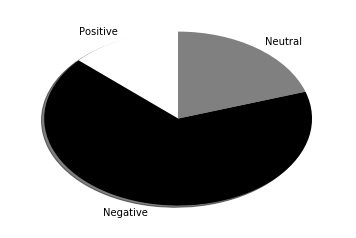

In [173]:
colors = ['white', 'black', 'grey']
sizes = [len(positive_tweets), len(negative_tweets), len(neutral_tweets)]
labels = 'Positive', 'Negative', 'Neutral'

plt.pie(
   x=sizes,
   shadow=True,
   colors=colors,
   labels=labels,
   startangle=90
)

#plt.title("Sentiment of {} Tweets about {}".format(number, query))
plt.show()

# Twitter data analysis from the week closer to demonetisation in the past.(21st - 23rd Nov 2016

In [174]:
twitterOlderData=pd.read_csv("/Users/swapnilvermani/Downloads/Demonetization_data29th.csv",encoding = "ISO-8859-1")

In [175]:
print(twitterOlderData.head(10))

   ID                   QUERY      TWEET_ID INSERTED DATE  TRUNCATED LANGUAGE  \
0   1  %2523%23demonetization  8.036840e+17       07:11.2          0       en   
1   2  %2523%23demonetization  8.036830e+17       07:11.5          0       en   
2   3  %2523%23demonetization  8.036830e+17       07:11.8          0       en   
3   4  %2523%23demonetization  8.036830e+17       07:12.5          0       en   
4   5  %2523%23demonetization  8.036830e+17       07:12.7          0       en   
5   6  %2523%23demonetization  8.036830e+17       07:13.1          0       en   
6   7  %2523%23demonetization  8.036830e+17       07:13.4          0       en   
7   8  %2523%23demonetization  8.036820e+17       07:13.6          0       en   
8   9  %2523%23demonetization  8.036810e+17       07:14.1          0       en   
9  10  %2523%23demonetization  8.036810e+17       07:14.4          0       en   

   possibly_sensitive coordinates                         retweeted_status  \
0                 NaN         

In [176]:
## Clean and Sentiment Analysis the Tweet

from textblob import TextBlob                    # library for processing textual data          
import re

def clean_tweet(tweet):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
    #We're returning the tweet which is cleaned(after replacin' the above pattern to null which means deleting)


def get_polarity(tweet):                         # here we're getting the polarity of each tweet after analysing it
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:          #polarity tells whether the tweet is postive or negative or neutral
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [177]:
## Adding Sentiment Column

twitterOlderData['Sentiment'] = np.array([ get_polarity(tweet) for tweet in twitterOlderData['CONTENT'] ])

In [178]:
print (twitterOlderData.head())

   ID                   QUERY      TWEET_ID INSERTED DATE  TRUNCATED LANGUAGE  \
0   1  %2523%23demonetization  8.036840e+17       07:11.2          0       en   
1   2  %2523%23demonetization  8.036830e+17       07:11.5          0       en   
2   3  %2523%23demonetization  8.036830e+17       07:11.8          0       en   
3   4  %2523%23demonetization  8.036830e+17       07:12.5          0       en   
4   5  %2523%23demonetization  8.036830e+17       07:12.7          0       en   

   possibly_sensitive coordinates                         retweeted_status  \
0                 NaN         NaN  THIS IS A RETWEET --> DOUBLE-CHECK JSON   
1                 NaN         NaN  THIS IS A RETWEET --> DOUBLE-CHECK JSON   
2                 NaN         NaN  THIS IS A RETWEET --> DOUBLE-CHECK JSON   
3                 0.0         NaN                                      NaN   
4                 0.0         NaN                                      NaN   

                  created_at_text    ...    

In [179]:
## Classifying the tweets

positive_tweets = [ tweet for index, tweet in enumerate(twitterOlderData['CONTENT']) if twitterOlderData['Sentiment'][index] > 0]
neutral_tweets = [ tweet for index, tweet in enumerate(twitterOlderData['CONTENT']) if twitterOlderData['Sentiment'][index] == 0]
negative_tweets = [ tweet for index, tweet in enumerate(twitterOlderData['CONTENT']) if twitterOlderData['Sentiment'][index] < 0]      

positive_data = pd.DataFrame (data = [ tweet for index, tweet in enumerate(twitterOlderData['CONTENT']) if twitterOlderData['Sentiment'][index] > 0])
neutral_data = [ tweet for index, tweet in enumerate(twitterOlderData['CONTENT']) if twitterOlderData['Sentiment'][index] == 0]
negative_data = [ tweet for index, tweet in enumerate(twitterOlderData['CONTENT']) if twitterOlderData['Sentiment'][index] < 0]      

In [180]:
positive_data

,0
0,"RT @SirJadeja: Yes, #????_?????_??_???_??. Fir..."
1,The latest Awlwood Joinery Devon Times Daily! ...
2,The latest Business Breakthroughs Daily! https...
3,RT @VijaiSardesai: Kudos to the #MargaoMunicip...
4,RT @dhume: Chhibber: By itself India's #demone...
5,RT @ajaymaken: #JanAkroshMarch on #Demonetizat...
6,The latest My Forex Academy! https://t.co/m4OR...
7,"RT @SirJadeja: Yes, #????_?????_??_???_??. Fir..."
8,"RT @SirJadeja: Yes, #????_?????_??_???_??. Fir..."
9,RT @Chopsyturvey: Telangana CM K. Chandrasheka...


In [181]:
## Print the negative tweets

print(negative_tweets[:10])

['RT @mdbaid: Incompetence of modi is d reason for national loss, occurred due to ill prepared #demonetization#???_???_??_????? https://t.co\x85', 'RT @NilimDutta: Swachh Bharat Abhiyan? #EpicFailMake in India? Epic FailSurgical Strike? Epic Fail#DeMonetization? Epic Fail', 'Bhakts routine*Wakeup: Eat*Term 10 Common man questioning #demonetization as Terrorist *Never answer,Talk &amp; tweet like crap*Sleep', 'RT @BSLMF: Don\x92t let that increased balance due to #demonetization sit idle. 6 month plans for short term goals.https://t.co/ot0RZunT7R(1\x85', 'RT @BSLMF: Increased account balance due to #demonetization? 18 month to 3 yrs plans to help accomplish your goals. https://t.co/wqJIkUkiH\x85', 'RT @BSLMF: Don\x92t let that increased balance due to #demonetization sit idle. 6 month plans for short term goals.https://t.co/ot0RZunT7R(1\x85', 'RT @BSLMF: Make that increased account balance due to #demonetization work. Upto 18 month plans for your goals. https://t.co/EVNcsJXXGb(1\x85', '

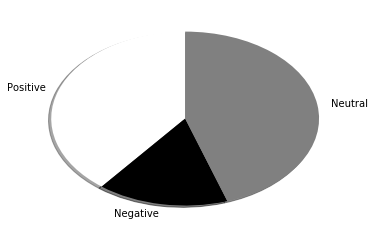

In [182]:
colors = ['white', 'black', 'grey']
sizes = [len(positive_tweets), len(negative_tweets), len(neutral_tweets)]
labels = 'Positive', 'Negative', 'Neutral'

plt.pie(
   x=sizes,
   shadow=True,
   colors=colors,
   labels=labels,
   startangle=90
)

#plt.title("Sentiment of {} Tweets about {}".format(number, query))
plt.show()

# Sentimental transaction on Digital transactions in the past week

In [183]:
## Retrieving Tweets

# Tweets can be retrieved by passing required parameters
#screen_name=The name of the user for whom to return results.
#count=specifies the number of tweets that we require.
#since_id=returns id greater than from that which we're retrieving tweets from that tweet_id
#max_id=returns id less than that or equal to that id

connection = info_extraction()                                                 # Calling the funtion from where we have got the connection

tweets = connection.search("digital transactions",lang="en")
 

print("Number of tweets that are extracted: {}\n".format(len(tweets))) 
print("10 recent tweets:\n")
for x in tweets[:10]:
    print(x.text)   

Number of tweets that are extracted: 15

10 recent tweets:

RT @records_keeper: https://t.co/ZstilPky7X List of #Blockchain Explorers - #Blockchain_Council #Blockchain_Technology #Blockchain_Use_Case…
RT @wef: Protecting digital transactions and preventing fraud. Learn more: https://t.co/PyzsYSsFW0 https://t.co/3g4T7C4jxW
RT @THE4THPILLARLTD: The 4th Pillar will strongly reduce the use of paper as it is based on blockchain transactions and digital communicati…
Trust in Banks Highest Since 2012, but Declining Branch Visits and Increased Digital Transactions Risk Eroding Cust… https://t.co/AaTMZ6EDli
RT @sgame_official: Tokenomics: economical and financial models that use distributed finance and tokenization as the basis of the economy.…
RT @gamestatix: Blockchain technologies are the future of secure and stable digital transactions. And the market for blockchain technologie…
RT @riazAkhan: The digital deed: what will the #digitalmortgage mean for property transactions? #digitatransforma

In [184]:

data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets']) 
print(data.head(10))


                                              Tweets
0  RT @records_keeper: https://t.co/ZstilPky7X Li...
1  RT @wef: Protecting digital transactions and p...
2  RT @THE4THPILLARLTD: The 4th Pillar will stron...
3  Trust in Banks Highest Since 2012, but Declini...
4  RT @sgame_official: Tokenomics: economical and...
5  RT @gamestatix: Blockchain technologies are th...
6  RT @riazAkhan: The digital deed: what will the...
7  Accumulate cash on ShopBack\n\nPOPULAR “online...
8  RT @Bitbosecoin: @Bitbosecoin 's features are ...
9  RT @sgame_official: Tokenomics: economical and...


In [185]:
## Adding Columns to DataFrame

data['len']  = np.array([len(tweet.text) for tweet in tweets])      
data['Date'] = np.array([tweet.created_at for tweet in tweets])     
data['Likes']= np.array([tweet.favorite_count for tweet in tweets])
data['RTs']= np.array([tweet.retweet_count for tweet in tweets])
data['User']=np.array([tweet.user for tweet in tweets])
data['Id']=np.array([tweet.id for tweet in tweets])

In [186]:
## Adding Sentiment Column

data['Sentiment'] = np.array([ get_polarity(tweet) for tweet in data['Tweets'] ])

In [187]:
## Print top 10 tweets and notice Sentiment field added at the end of each record
print(data.head(10))

                                              Tweets  len                Date  \
0  RT @records_keeper: https://t.co/ZstilPky7X Li...  140 2018-06-24 14:17:21   
1  RT @wef: Protecting digital transactions and p...  122 2018-06-24 14:06:15   
2  RT @THE4THPILLARLTD: The 4th Pillar will stron...  140 2018-06-24 14:04:20   
3  Trust in Banks Highest Since 2012, but Declini...  140 2018-06-24 14:04:12   
4  RT @sgame_official: Tokenomics: economical and...  139 2018-06-24 13:55:38   
5  RT @gamestatix: Blockchain technologies are th...  140 2018-06-24 13:43:21   
6  RT @riazAkhan: The digital deed: what will the...  140 2018-06-24 13:37:44   
7  Accumulate cash on ShopBack\n\nPOPULAR “online...  140 2018-06-24 13:25:55   
8  RT @Bitbosecoin: @Bitbosecoin 's features are ...  140 2018-06-24 13:22:04   
9  RT @sgame_official: Tokenomics: economical and...  139 2018-06-24 13:18:57   

   Likes  RTs                                               User  \
0      0    5  User(_api=<tweepy.api.API

In [188]:
## Classifying the tweets

positive_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['Sentiment'][index] > 0]
neutral_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['Sentiment'][index] == 0]
negative_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['Sentiment'][index] < 0]      

positive_data = pd.DataFrame (data = [ tweet for index, tweet in enumerate(data['Tweets']) if data['Sentiment'][index] > 0])
neutral_data = [ tweet for index, tweet in enumerate(data['Tweets']) if data['Sentiment'][index] == 0]
negative_data = [ tweet for index, tweet in enumerate(data['Tweets']) if data['Sentiment'][index] < 0]    

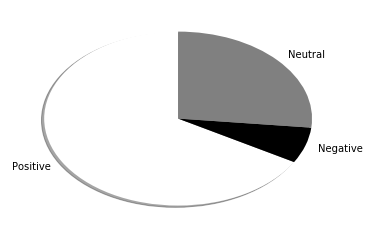

In [189]:
colors = ['white', 'black', 'grey']
sizes = [len(positive_tweets), len(negative_tweets), len(neutral_tweets)]
labels = 'Positive', 'Negative', 'Neutral'

plt.pie(
   x=sizes,
   shadow=True,
   colors=colors,
   labels=labels,
   startangle=90
)

#plt.title("Sentiment of {} Tweets about {}".format(number, query))
plt.show()